In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization,Dropout


In [ ]:
train_set = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(258,258)

)

validation_set = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(258,258)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_set = train_set.map(process)
validation_set = validation_set.map(process)


In [ ]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu', input_shape=(258,258,3)),BatchNormalization(),

    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation = 'relu'),BatchNormalization(),

    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation = 'relu'),BatchNormalization(),

    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation = 'relu'),Dropout(0.1),
    Dense(64,activation = 'relu'),Dropout(0.1),
    Dense(1,activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 126, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 61, 61, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,epochs=10,validation_data=validation_set)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 82ms/step - accuracy: 0.5737 - loss: 2.2382 - val_accuracy: 0.5544 - val_loss: 1.2438
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 82ms/step - accuracy: 0.6762 - loss: 0.6038 - val_accuracy: 0.6646 - val_loss: 0.6334
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.7433 - loss: 0.5237 - val_accuracy: 0.7450 - val_loss: 0.5094
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7921 - loss: 0.4445 - val_accuracy: 0.7912 - val_loss: 0.4481
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8233 - loss: 0.3906 - val_accuracy: 0.7978 - val_loss: 0.4530
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8546 - loss: 0.3328 - val_accuracy: 0.7706 - val_loss: 0.5008
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.8979 - loss: 0.2497 - val_accuracy: 0.8078 - val_loss: 0.4717
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9330 - loss: 0.1653 - 

In [ ]:
 import cv2

In [ ]:
test_image = cv2.imread('/content/beagle.jpg')

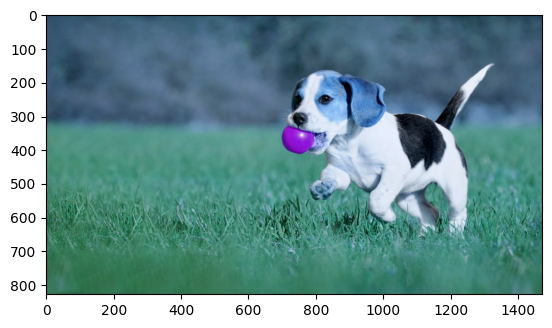

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(828, 1472, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test = test_image.reshape((1,256,256,3))

In [ ]:
Y = model.predict(test)
if(Y>0.5):
  print("MY MODEL SAYS IT'S A CAT!")
else:
  print("MY MODEL SAYS IT'S A DOG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MY MODEL SAYS IT'S A DOG
